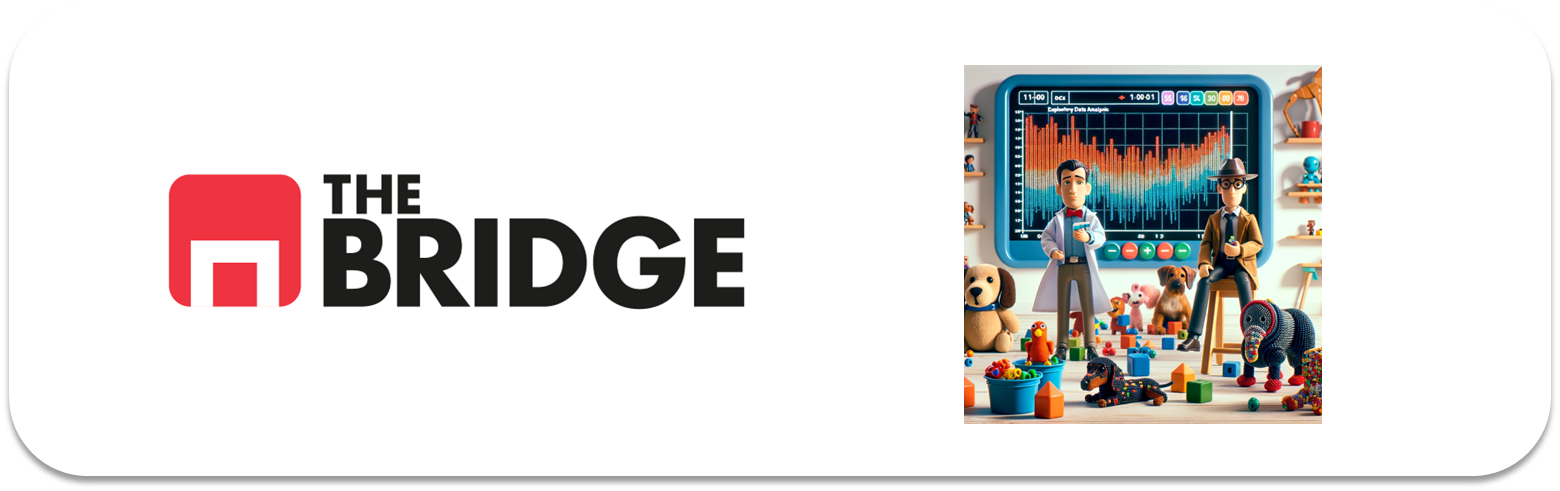

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bootcampviztools import plot_grouped_histograms,bubble_plot, plot_grouped_boxplots, plot_categorical_numerical_relationship, plot_categorical_relationship_fin, grafico_dispersion_con_correlacion, plot_combined_graphs
from scipy.stats import chi2_contingency, ttest_ind

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [20]:
df_titanic= sns.load_dataset('titanic')
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [21]:
df_titanic.drop(columns=['deck','survived','pclass','embarked'], inplace = True)
df_titanic

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [22]:
df_titanic['family_members'] = df_titanic['parch'] + df_titanic['sibsp']
df_titanic.drop(columns=['parch', 'sibsp'], inplace=True)
df_titanic

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [23]:
moda = df_titanic['embark_town'].mode()[0]
df_titanic['embark_town'].fillna(moda, inplace=True)
df_titanic

C:\Users\buque\AppData\Local\Temp\ipykernel_10864\2721062482.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['embark_town'].fillna(moda, inplace=True)


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [24]:
agrupar = df_titanic.groupby('who')['age'].mean()
df_titanic['age'] = df_titanic.apply(lambda x: agrupar[x['who']] if pd.isnull(x['age']) else x['age'], axis=1)
df_titanic

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,32.0,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

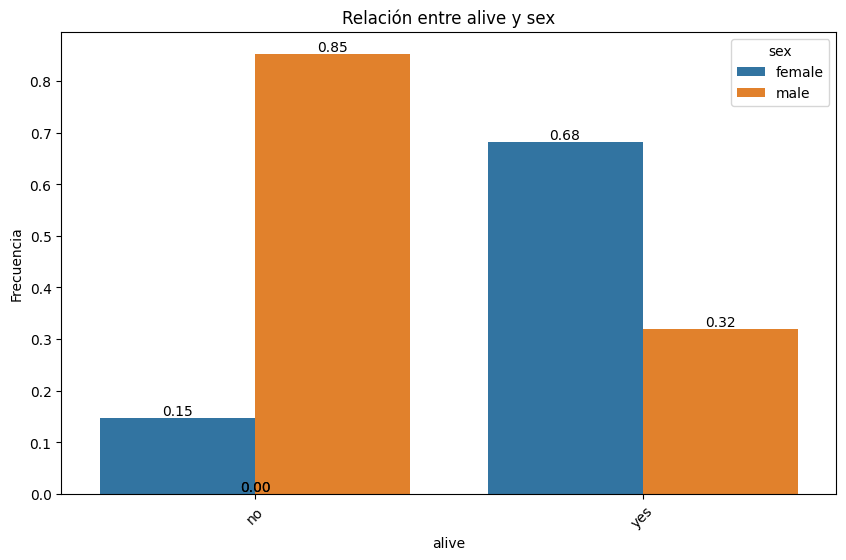

In [46]:
plot_categorical_relationship_fin(df_titanic,'alive','sex', 'age', show_values=True)

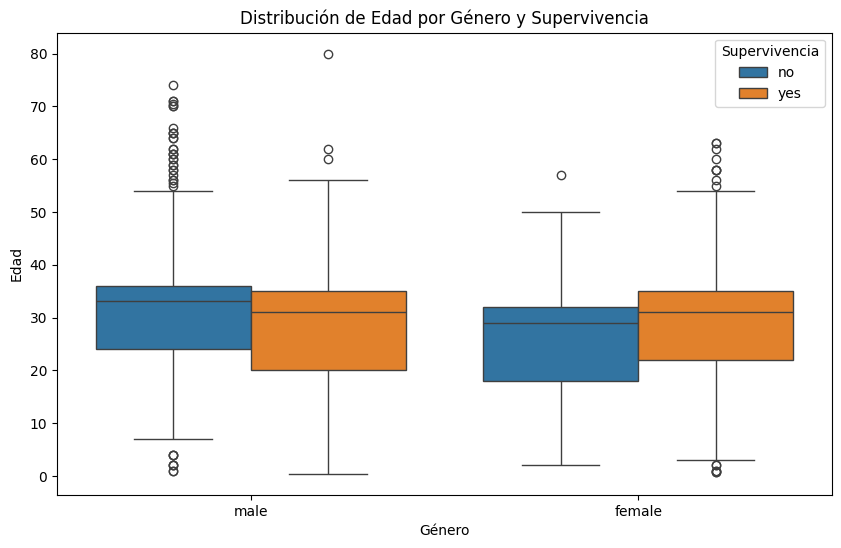

In [43]:
# Boxplot de edad por género y supervivencia
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_titanic, x='sex', y='age', hue='alive')
plt.title("Distribución de Edad por Género y Supervivencia")
plt.xlabel("Género")
plt.ylabel("Edad")
plt.legend(title="Supervivencia")
plt.show()

In [51]:
# Número total de sobrevivientes por género y por grupo de edad
survived_by_gender = df_titanic.groupby('sex')['alive'].value_counts()
survived_by_who = df_titanic.groupby('who')['alive'].value_counts()

print("Número total de sobrevivientes por género:")
print(survived_by_gender)
print("\nNúmero total de sobrevivientes por grupo de edad:")
print(survived_by_who)

# Proporción de sobrevivientes por género y por grupo de edad
total_passengers = len(df_titanic)
proportion_survived_by_gender = survived_by_gender / total_passengers
proportion_survived_by_who = survived_by_who / total_passengers

print("\nProporción de sobrevivientes por género:")
print(proportion_survived_by_gender)
print("\nProporción de sobrevivientes por grupo de edad:")
print(proportion_survived_by_who)

# Test de chi-cuadrado para evaluar la independencia entre el género y la supervivencia
contingency_table_gender = pd.crosstab(df_titanic['sex'], df_titanic['alive'])
chi2_gender, p_gender, dof_gender, expected_gender = chi2_contingency(contingency_table_gender)
print("\nTest de chi-cuadrado para la relación entre el género y la supervivencia:")
print("Chi-cuadrado:", chi2_gender)
print("Valor p:", p_gender)

# Test de chi-cuadrado para evaluar la independencia entre ser adulto o niño y la supervivencia
contingency_table_who = pd.crosstab(df_titanic['who'], df_titanic['alive'])
chi2_who, p_who, dof_who, expected_who = chi2_contingency(contingency_table_who)
print("\nTest de chi-cuadrado para la relación entre ser adulto o niño y la supervivencia:")
print("Chi-cuadrado:", chi2_who)
print("Valor p:", p_who)


Número total de sobrevivientes por género:
sex     alive
female  yes      233
        no        81
male    no       468
        yes      109
Name: count, dtype: int64

Número total de sobrevivientes por grupo de edad:
who    alive
child  yes       49
       no        34
man    no       449
       yes       88
woman  yes      205
       no        66
Name: count, dtype: int64

Proporción de sobrevivientes por género:
sex     alive
female  yes      0.261504
        no       0.090909
male    no       0.525253
        yes      0.122334
Name: count, dtype: float64

Proporción de sobrevivientes por grupo de edad:
who    alive
child  yes      0.054994
       no       0.038159
man    no       0.503928
       yes      0.098765
woman  yes      0.230079
       no       0.074074
Name: count, dtype: float64

Test de chi-cuadrado para la relación entre el género y la supervivencia:
Chi-cuadrado: 260.71702016732104
Valor p: 1.1973570627755645e-58

Test de chi-cuadrado para la relación entre ser adulto

#1. Claramente hay una relacion entre ser mujer u hombre y sobrevivir, siendo las mujeres las mayores supervivientes. vemos tambien que la mayoria de niños se salvó, lo que indica que el peor escenario para salvar tu vida era ser hombre.

c:\Users\buque\OneDrive\Documentos\GitHub\DS_Online_Feb24_Exercises\03_Analisis_de_Datos\Sprint_07\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


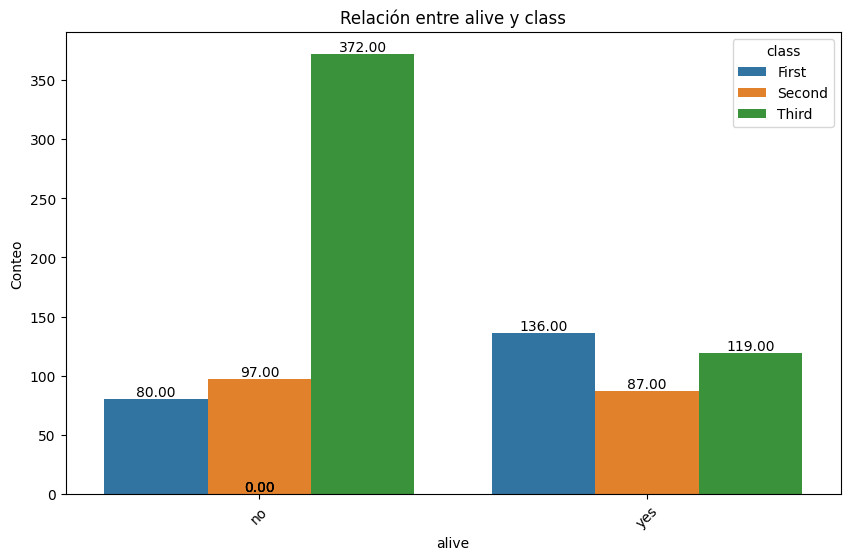

In [39]:
plot_categorical_relationship_fin(df_titanic,'alive','class', show_values=True)

In [44]:
# # Boxplot de clase por supervivencia
# plt.figure(figsize=(8, 6))
# sns.countplot(data=df_titanic, x='class', hue='alive')
# plt.title("Distribución de Supervivencia por Clase de Boleto")
# plt.xlabel("Clase de Boleto")
# plt.ylabel("Conteo")
# plt.legend(title="Supervivencia")
# plt.show()

In [52]:
# Número total de sobrevivientes por clase de boleto
survived_by_class = df_titanic.groupby('class')['alive'].value_counts()

print("\nNúmero total de sobrevivientes por clase de boleto:")
print(survived_by_class)

# Proporción de sobrevivientes por clase de boleto
proportion_survived_by_class = survived_by_class / total_passengers

print("\nProporción de sobrevivientes por clase de boleto:")
print(proportion_survived_by_class)

# Test de chi-cuadrado para evaluar la independencia entre la clase y la supervivencia
contingency_table_class = pd.crosstab(df_titanic['class'], df_titanic['alive'])
chi2_class, p_class, dof_class, expected_class = chi2_contingency(contingency_table_class)
print("\nTest de chi-cuadrado para la relación entre la clase y la supervivencia:")
print("Chi-cuadrado:", chi2_class)
print("Valor p:", p_class)


Número total de sobrevivientes por clase de boleto:
class   alive
First   yes      136
        no        80
Second  no        97
        yes       87
Third   no       372
        yes      119
Name: count, dtype: int64

Proporción de sobrevivientes por clase de boleto:
class   alive
First   yes      0.152637
        no       0.089787
Second  no       0.108866
        yes      0.097643
Third   no       0.417508
        yes      0.133558
Name: count, dtype: float64

Test de chi-cuadrado para la relación entre la clase y la supervivencia:
Chi-cuadrado: 102.88898875696056
Valor p: 4.549251711298793e-23


C:\Users\buque\AppData\Local\Temp\ipykernel_10864\1834999673.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_by_class = df_titanic.groupby('class')['alive'].value_counts()


#2. Vemos que los de primera clase fueron los unicos que tuvieron mas supervivientes que bajas, siendo la segunda clase tambien bastante igualada pero con el conteo de bajas ya por encima del de supervivientes, sacamos en conclusion que la peor opcion para salvar tu vida era viajar en tercera clase.

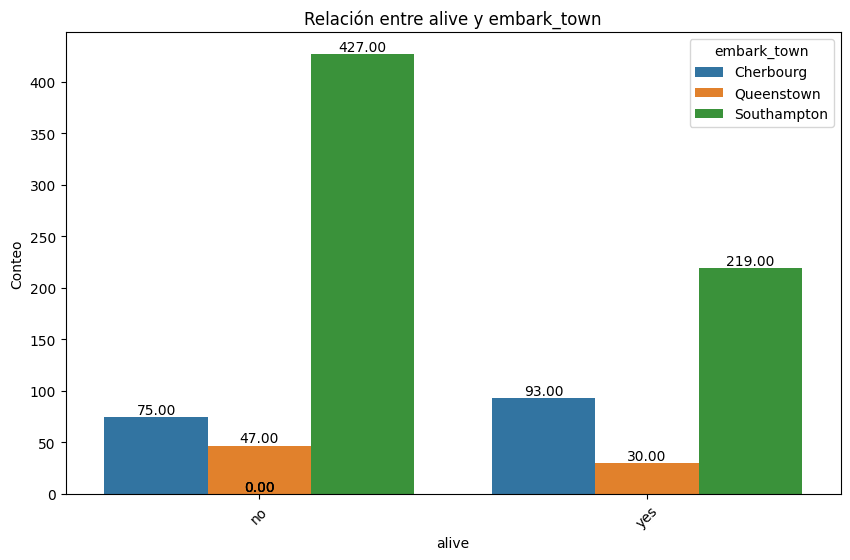

In [49]:
plot_categorical_relationship_fin(df_titanic,'alive','embark_town', show_values=True)

In [50]:
# # Gráfico de barras apiladas de ciudad de embarque por supervivencia
# plt.figure(figsize=(8, 6))
# sns.countplot(data=df_titanic, x='embark_town', hue='alive')
# plt.title("Distribución de Supervivencia por Ciudad de Embarque")
# plt.xlabel("Ciudad de Embarque")
# plt.ylabel("Conteo")
# plt.legend(title="Supervivencia")
# plt.show()


In [54]:
# Número total de sobrevivientes por ciudad de embarque
survived_by_embark_town = df_titanic.groupby('embark_town')['alive'].value_counts()

print("\nNúmero total de sobrevivientes por ciudad de embarque:")
print(survived_by_embark_town)

# Proporción de sobrevivientes por ciudad de embarque
proportion_survived_by_embark_town = survived_by_embark_town / total_passengers

print("\nProporción de sobrevivientes por ciudad de embarque:")
print(proportion_survived_by_embark_town)

# Test de chi-cuadrado para evaluar la independencia entre la ciudad de embarque y la supervivencia
contingency_table_embark_town = pd.crosstab(df_titanic['embark_town'], df_titanic['alive'])
chi2_embark_town, p_embark_town, dof_embark_town, expected_embark_town = chi2_contingency(contingency_table_embark_town)
print("\nTest de chi-cuadrado para la relación entre la ciudad de embarque y la supervivencia:")
print("Chi-cuadrado:", chi2_embark_town)
print("Valor p:", p_embark_town)


Número total de sobrevivientes por ciudad de embarque:
embark_town  alive
Cherbourg    yes       93
             no        75
Queenstown   no        47
             yes       30
Southampton  no       427
             yes      219
Name: count, dtype: int64

Proporción de sobrevivientes por ciudad de embarque:
embark_town  alive
Cherbourg    yes      0.104377
             no       0.084175
Queenstown   no       0.052750
             yes      0.033670
Southampton  no       0.479237
             yes      0.245791
Name: count, dtype: float64

Test de chi-cuadrado para la relación entre la ciudad de embarque y la supervivencia:
Chi-cuadrado: 25.964452881874784
Valor p: 2.3008626481449577e-06


#3. Se podria decir que si hay relacion entre la ciudad de embarque y las posibilidades de sobrevivir, vemos como la mayoria de usuarios habian embarcado en Southampton, por lo que es normal que esta tenga más datos. Sin embargo parece que era la peor opción, si de mantener la vida se trata, ya que falleció la mayoría de usuarios que habían embarcado en dicha ciudad. Contrasta con Cherbourg, la cual dejo mas supervivientes que decesos. 
Sería interesante cruzar estos datos con las tarifas que pagaron los usuarios o las clases a las que pertenecian.

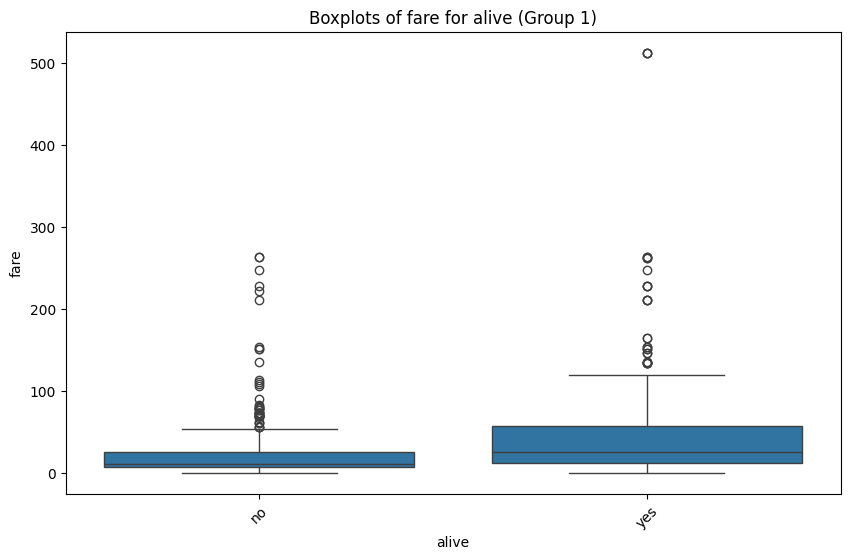

In [55]:
plot_grouped_boxplots(df_titanic, 'alive','fare')

In [56]:
# # Boxplot de tarifa según la supervivencia
# plt.figure(figsize=(8, 6))
# sns.boxplot(data=df_titanic, x='alive', y='fare')
# plt.title("Distribución de Tarifa por Supervivencia")
# plt.xlabel("Supervivencia")
# plt.ylabel("Tarifa")
# plt.show()


In [58]:
# Test t de Student para comparar las tarifas pagadas por los pasajeros que sobrevivieron y los que no
survived_fare = df_titanic[df_titanic['alive'] == 'yes']['fare']
not_survived_fare = df_titanic[df_titanic['alive'] == 'no']['fare']

t_stat_fare, p_value_fare = ttest_ind(survived_fare, not_survived_fare)
print("Estadístico t:", t_stat_fare)
print("Valor p:", p_value_fare)

Estadístico t: 7.939191660871055
Valor p: 6.120189341924198e-15


#4. Parece que era mas probable que salvaras tu vida si habías pagado el billete y por supuesto que los que se salvaron habian pagado en general mas por el billete que los que no. No obstante, no me parecen muy consistentes los datos y no creo que la hipotesis sea fuerte.

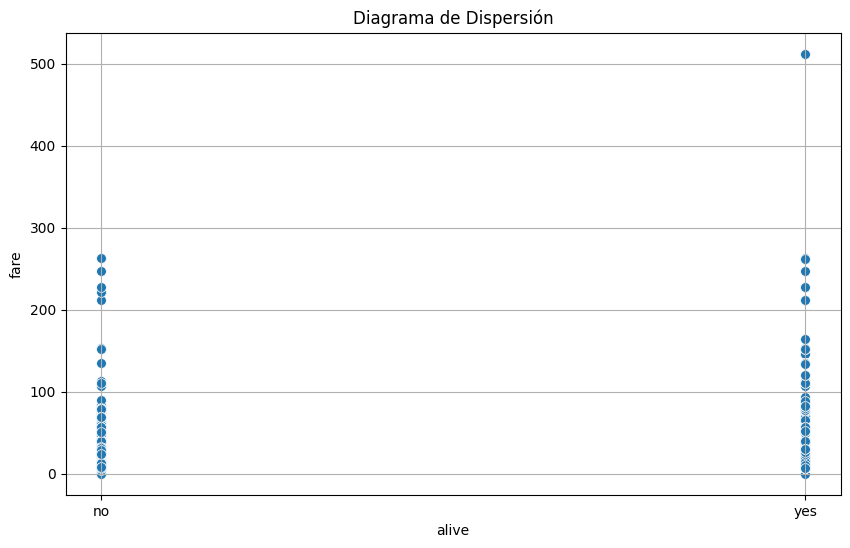

In [62]:
grafico_dispersion_con_correlacion(df_titanic, 'alive', 'fare', tamano_puntos= 50)

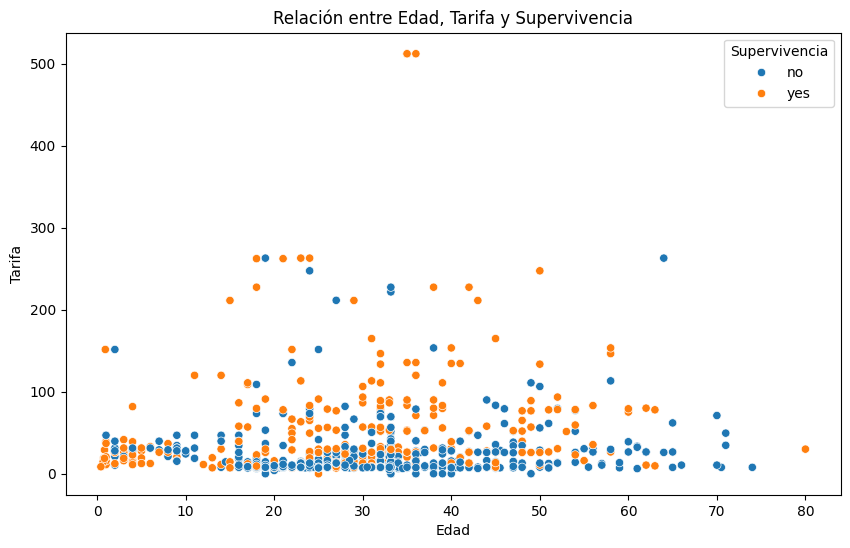

In [29]:
# Scatterplot de edad y tarifa según la supervivencia
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_titanic, x='age', y='fare', hue='alive')
plt.title("Relación entre Edad, Tarifa y Supervivencia")
plt.xlabel("Edad")
plt.ylabel("Tarifa")
plt.legend(title="Supervivencia")
plt.show()


#5. Parece que si hubo usuarios que no pagaron el billete, pero ante la falta de datos no podemos saber las causas, al igual que sabemos que el precio mas alto que se pagó fue de algo mas de 500 dolares.

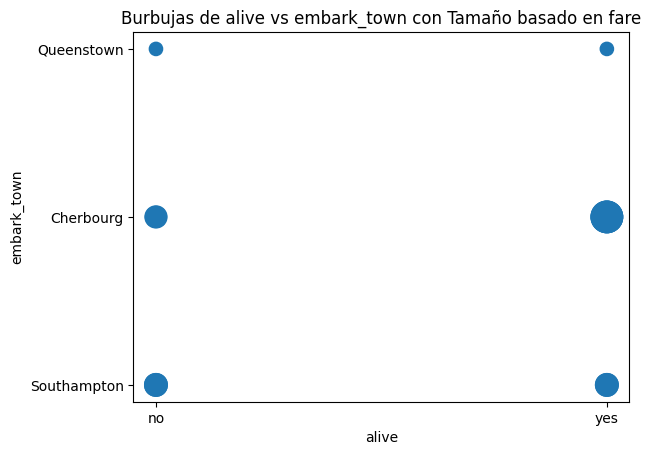

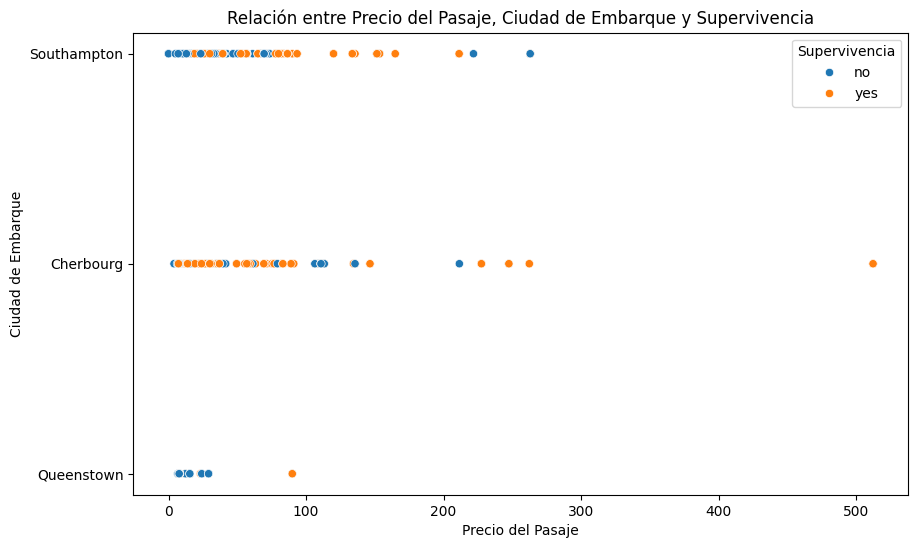

In [142]:
bubble_plot(df_titanic, 'alive', 'embark_town','fare', scale=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_titanic, x='fare', y='embark_town', hue='alive')
plt.title("Relación entre Precio del Pasaje, Ciudad de Embarque y Supervivencia")
plt.xlabel("Precio del Pasaje")
plt.ylabel("Ciudad de Embarque")
plt.legend(title="Supervivencia")
plt.show()


#6. Finalmente hacemos el estudio que mencione antes, averiguamos que parece que efectivamente vemos que segun mas se pagaba de tarifa mas probabilidad de supervivencia habia, imagino que por las zonas de emergencia habilitadas con dicho fin.
Finalmente, vemos que a pesar de que parece que para el mismo rango de preciohabia mas probabilidades de sobrevivir si embarcabas en Cherbourg que en Southampton, curioso. 

In [135]:
# plot_grouped_histograms(df_titanic, 'alive','age', 10)
# plot_grouped_histograms(df_titanic, 'class','age', 10)
# pinta_distribucion_categoricas(df_titanic,['alive','class'])
# plot_categorical_relationship_fin(df_titanic,'alive','class', 'age', show_values=True)

C:\Users\buque\AppData\Local\Temp\ipykernel_10864\1465118689.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  alive_class_age = df_titanic.groupby(['class', pd.cut(df_titanic['age'], bins=range(0, 100, 10))])['alive'].value_counts().unstack().fillna(0)


Tabla de contingencia de supervivencia/fallecimiento por clase y edad:
alive             no  yes
class  age               
First  (0, 10]     1    2
       (10, 20]    3   15
       (20, 30]   11   29
       (30, 40]   28   51
       (40, 50]   16   21
       (50, 60]   10   15
       (60, 70]    9    2
       (70, 80]    2    1
       (80, 90]    0    0
Second (0, 10]     0   17
       (10, 20]    9    9
       (20, 30]   36   25
       (30, 40]   31   23
       (40, 50]    9   10
       (50, 60]   10    2
       (60, 70]    2    1
       (70, 80]    0    0
       (80, 90]    0    0
Third  (0, 10]    25   19
       (10, 20]   59   20
       (20, 30]   99   30
       (30, 40]  152   47
       (40, 50]   28    2
       (50, 60]    5    0
       (60, 70]    2    1
       (70, 80]    2    0
       (80, 90]    0    0

Estadístico de chi-cuadrado: 158.17460026737874
Valor p: 1.3550477598775814e-22


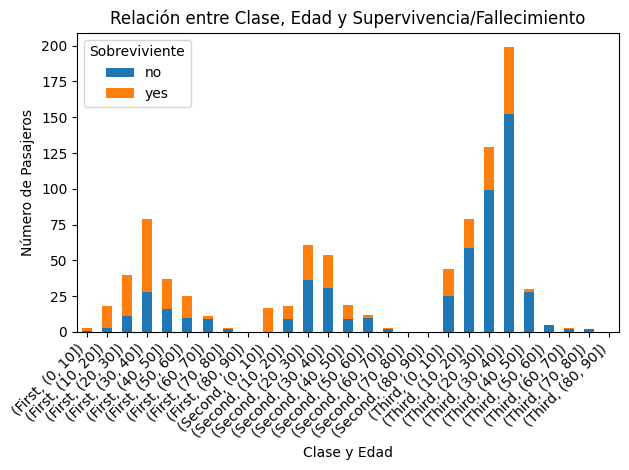

In [133]:
# Agrupamos por clase y edad y contamos el número de sobrevivientes y fallecidos
alive_class_age = df_titanic.groupby(['class', pd.cut(df_titanic['age'], bins=range(0, 100, 10))])['alive'].value_counts().unstack().fillna(0)
print("Tabla de contingencia de supervivencia/fallecimiento por clase y edad:")
print(alive_class_age)
cleaned = survival_class_age.loc[(survival_class_age != 0).any(axis=1), (survival_class_age != 0).any(axis=0)]
chi2, p, _, _ = chi2_contingency(cleaned)
print("\nEstadístico de chi-cuadrado:", chi2)
print("Valor p:", p)


survival_class_age.plot(kind='bar', stacked=True)
plt.xlabel('Clase y Edad')
plt.ylabel('Número de Pasajeros')
plt.title('Relación entre Clase, Edad y Supervivencia/Fallecimiento')
plt.legend(title='Sobreviviente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




En edades tempranas hubó más supervivientes que fallecidos, se debe a que los niños y las mujeres son las primeras a salvar en situaciones de emergencia. Además, es destacable que cuanta mejor era la clase en la que viajaban mayor la probabilidad de supervivencia.
En consecuencia, vemos como los hombres fueron los mayores perjudicados.

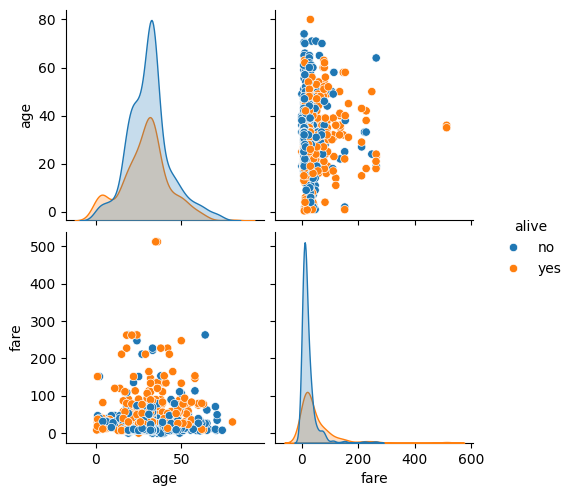

In [140]:
#8.
sns.pairplot(df_titanic, vars=['age', 'fare'], hue='alive', diag_kind='kde')

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


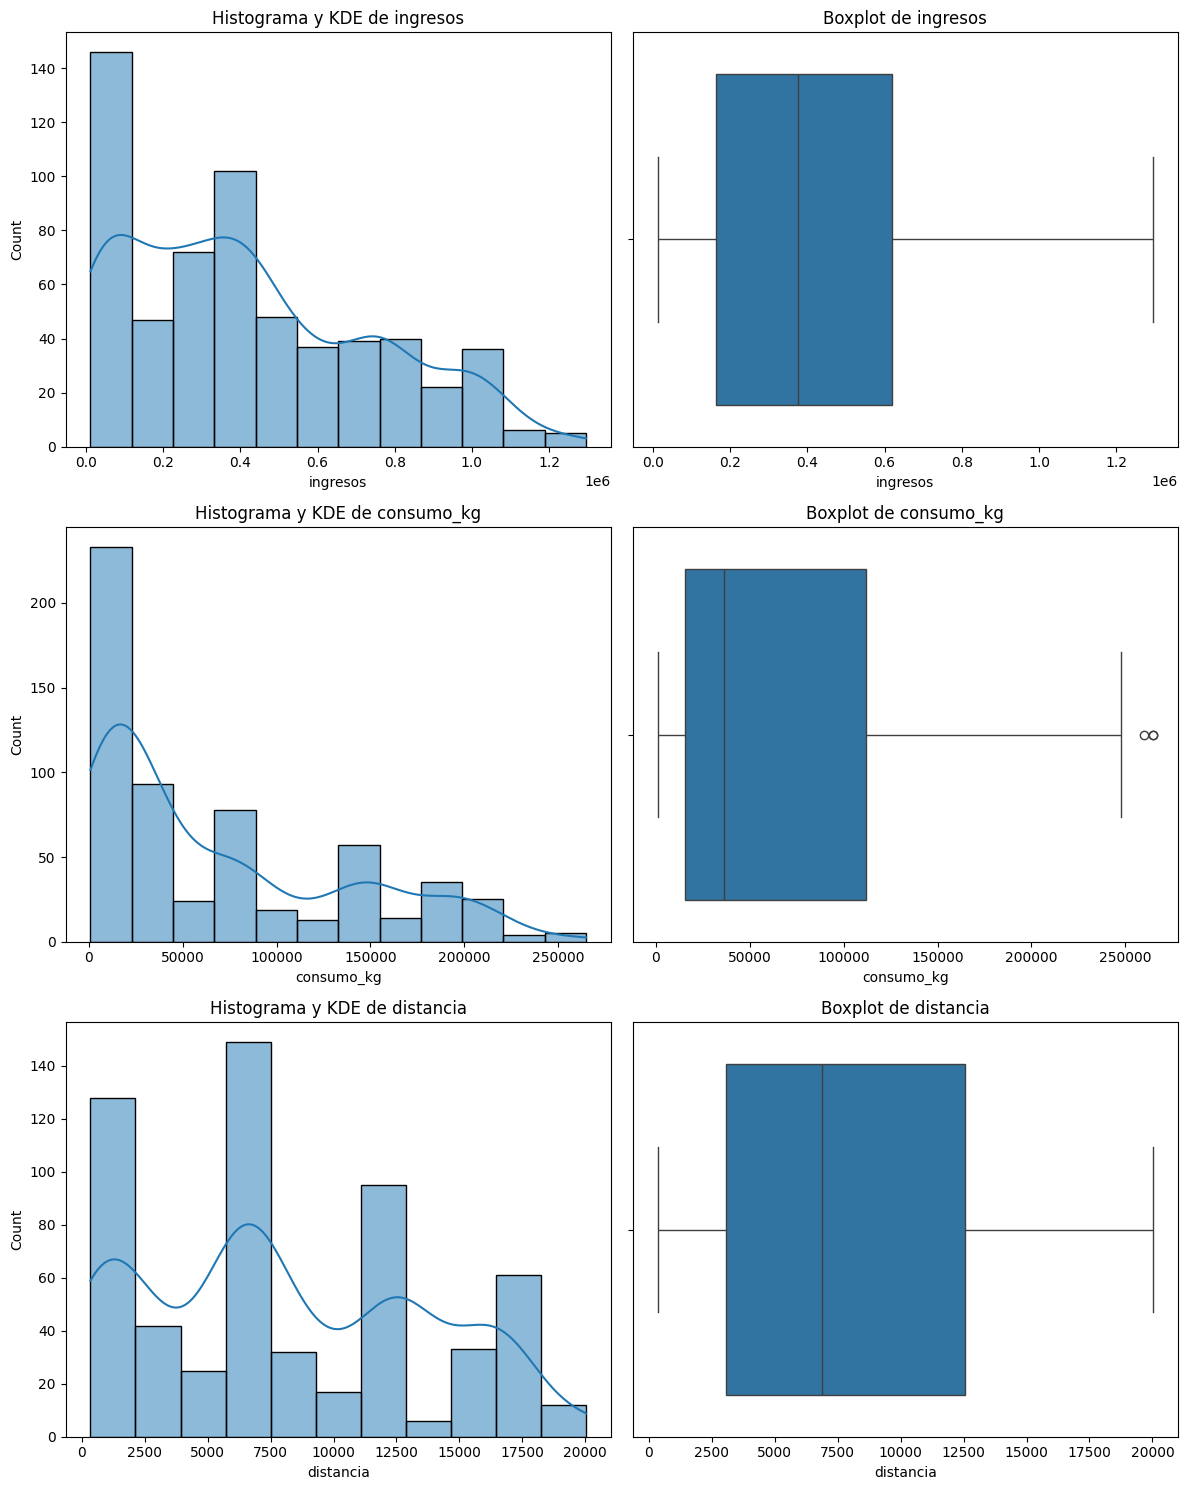

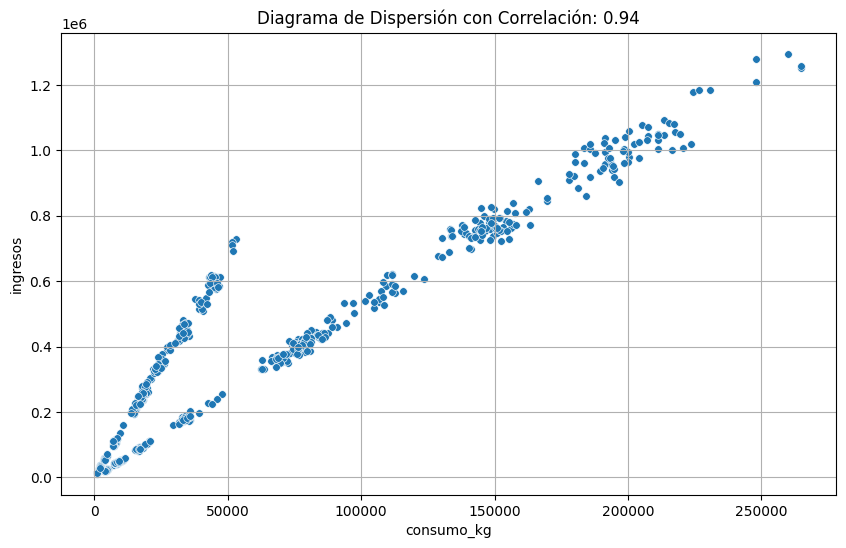

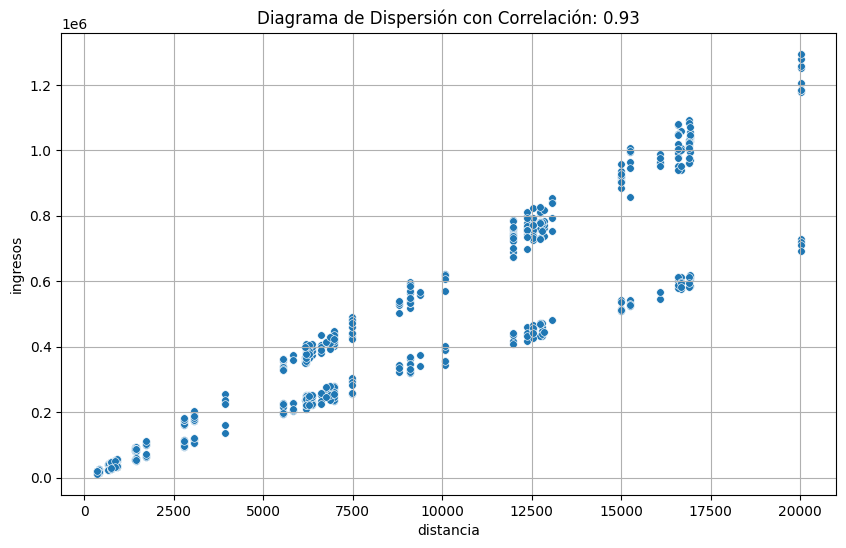

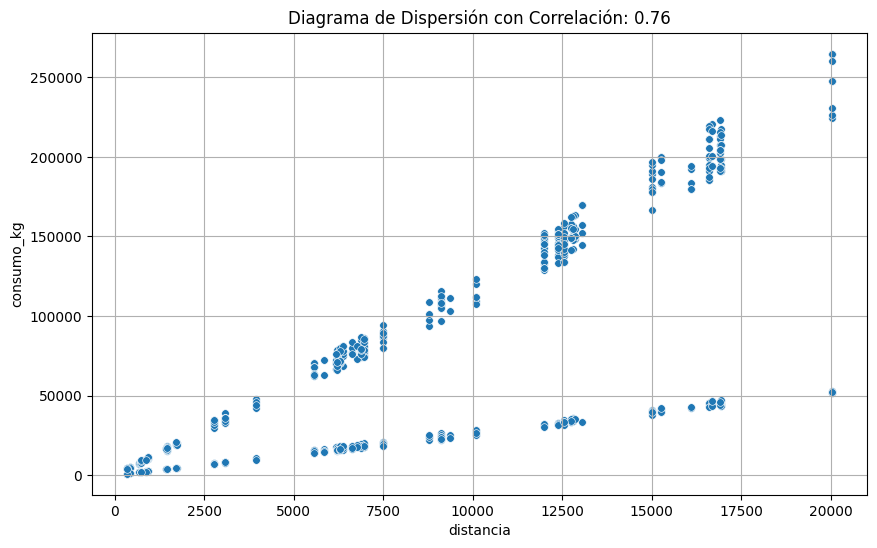

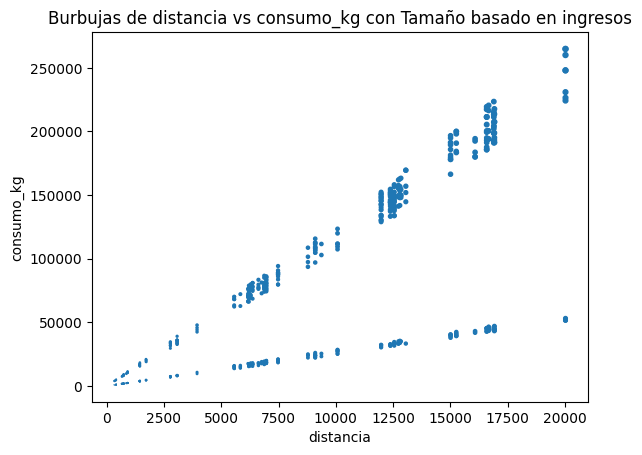

In [32]:
from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot

df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")

plot_combined_graphs(df_air_jun,["ingresos","consumo_kg","distancia"])
grafico_dispersion_con_correlacion(df_air_jun,"consumo_kg", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)
grafico_dispersion_con_correlacion(df_air_jun,"distancia","ingresos", mostrar_correlacion= True, tamano_puntos= 30)
grafico_dispersion_con_correlacion(df_air_jun,"distancia","consumo_kg", mostrar_correlacion= True, tamano_puntos= 30)
bubble_plot(df_air_jun,"distancia","consumo_kg","ingresos", scale = 100000)

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

(3, 2)


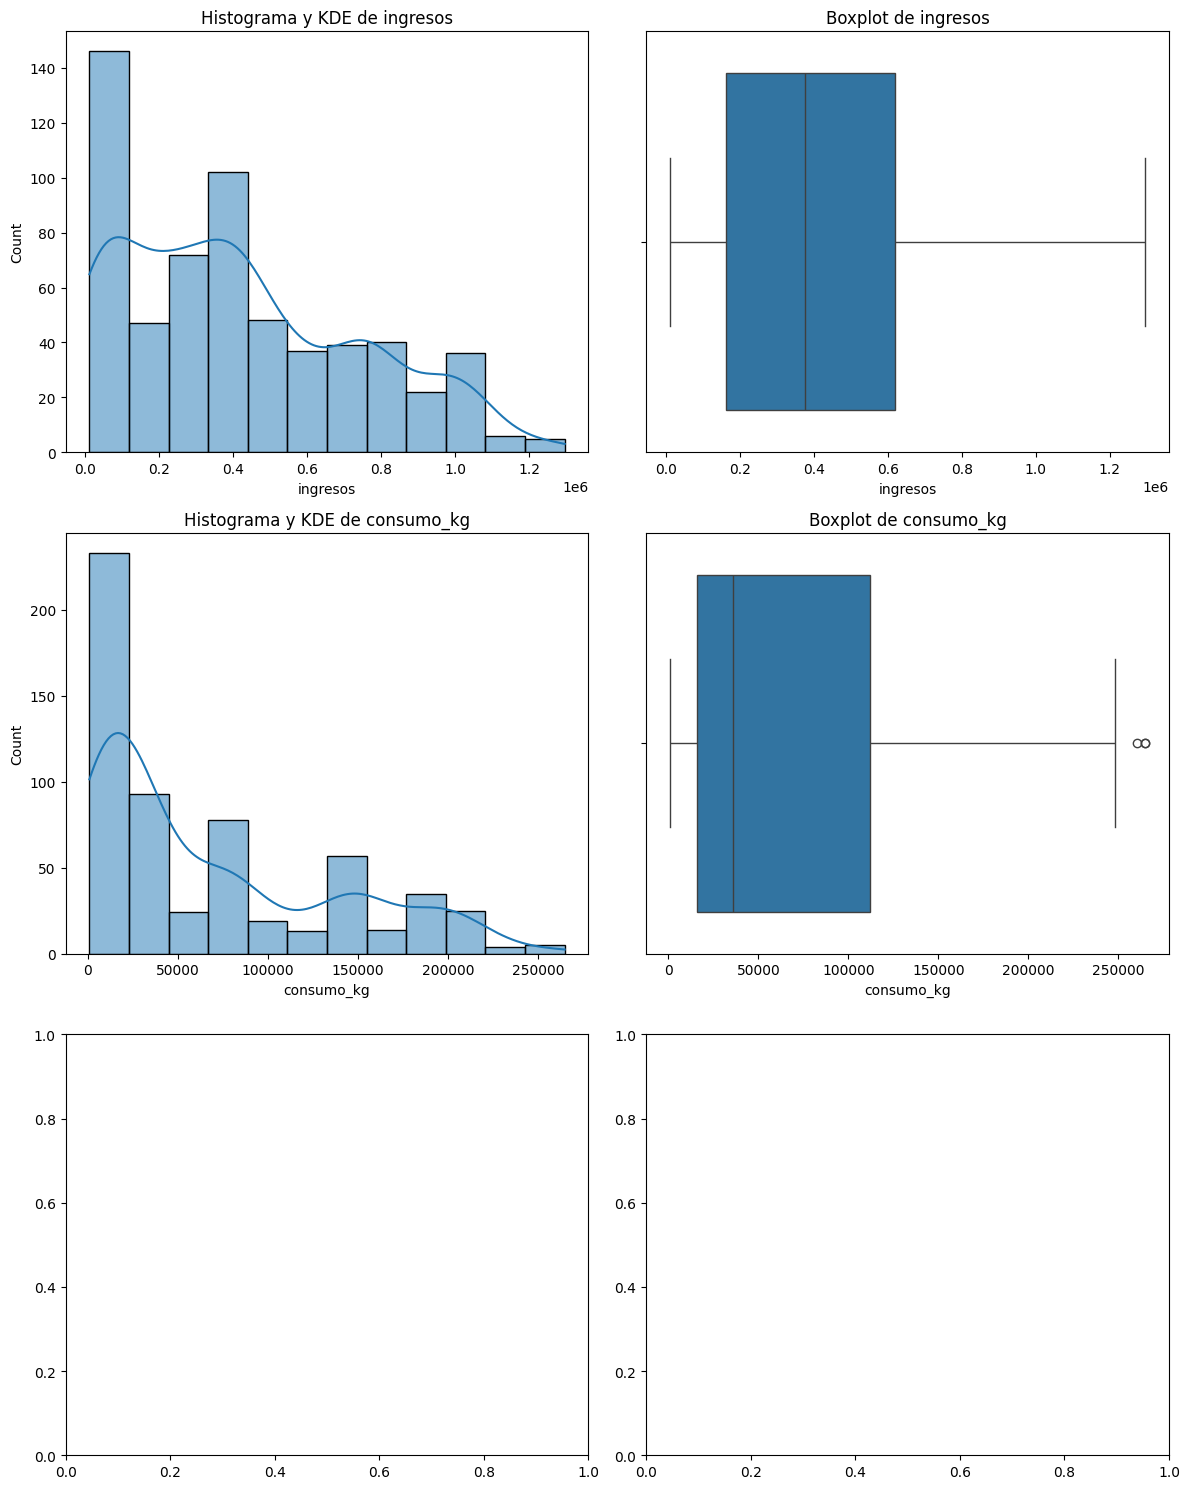

In [95]:
bins = [0, 500, 2000, 5000, df_air_jun['distancia'].max()]
labels = ['corto', 'medio', 'largo', 'muy largo']
df_air_jun['cat_vuelo'] = pd.cut(df_air_jun['distancia'], bins=bins, labels=labels, right=False)
df_air_jun
plot_combined_graphs(df_air_jun,["ingresos","consumo_kg","cat_vuelo"])
#bubble_plot(df_air_jun,"cat_vuelo","consumo_kg","ingresos", scale = 100000)

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.